In [2]:
using Pkg
Pkg.activate("C:/Users/lisah/Documents/Repos/ma-code")
include("c:/Users/lisah/Documents/Repos/ma-code/src/src.jl")
using .Src, Plots

  Activating project at `C:\Users\lisah\Documents\Repos\ma-code`


## Bifurcation plots - Parameter Estimation Points

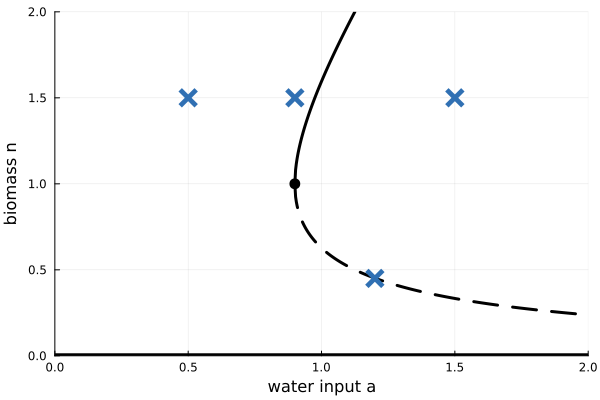

In [ ]:
pts = [[0.5,1.5], [0.9,1.5], [1.2,0.45], [1.5,1.5]]
bif_plot(0.45, "n", points=pts)

point combinations `[w0,n0,a,m]`:
 - `[1.0,1.5,0.5,0.45]`
 - `[0.2,1.5,0.9,0.45]`
 - `[1.0,0.45,1.2,0.45]`
 - `[0.8,1.5,1.5,0.45]`

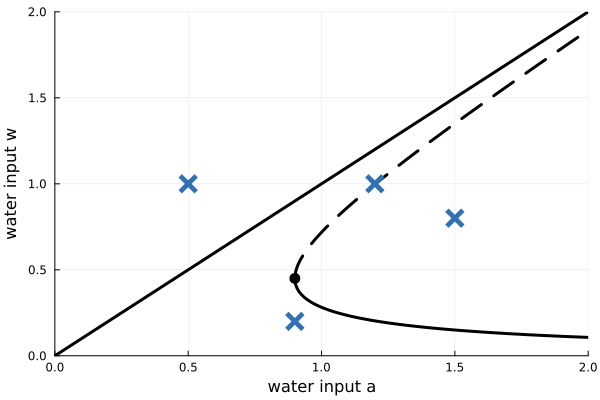

In [ ]:
pts = [[0.5,1.0], [0.9,0.2], [1.2,1.0], [1.5,0.8]]
bif_plot(0.45, "w", points=pts)

## Bifurcation plots - Sobol

The shaded region are the uniform sampling areas of the random parameters and initial conditions that are used for the Sobol analysis. The bifurcation point ´a=2m´ varies within the indicated limits.

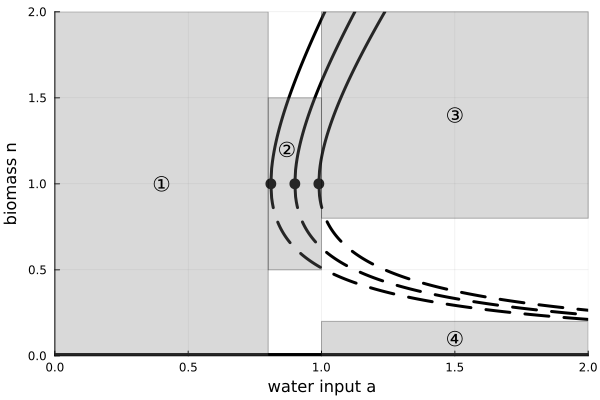

In [48]:
bif_plot(0.45, "n"), bif_plot!(0.405, "n"), bif_plot!(0.495, "n")
plot!(Shape([1, 2, 2, 1], [0, 0, 0.2, 0.2]), color=:gray, alpha=0.3, label="")
plot!(Shape([1, 2, 2, 1], [0.8, 0.8, 2.0, 2.0]), color=:gray, alpha=0.3, label="")
plot!(Shape([0.8, 1.0, 1.0, 0.8], [0.5, 0.5, 1.5, 1.5]), color=:gray, alpha=0.3, label="")
plot!(Shape([0, 0.8, 0.8, 0],[0, 0, 2, 2]), color=:gray, alpha=0.3, label="")

annotate!(1.5, 0.1, text("④", :black, 14, :center))  # for region 1
annotate!(1.5, 1.4, text("③", :black, 14, :center))  # for region 2
annotate!(0.87, 1.2, text("②", :black, 14, :center))
annotate!(0.4, 1.0, text("①", :black, 14, :center))

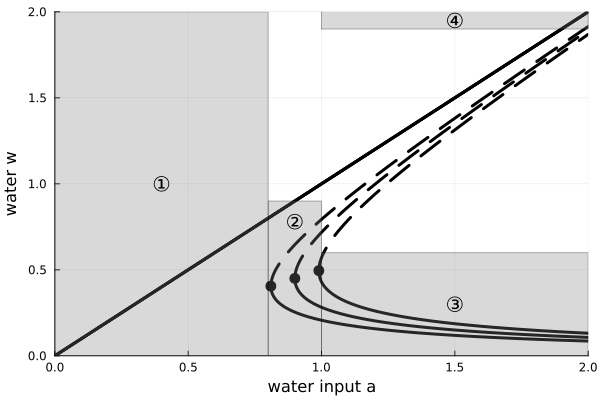

In [43]:
bif_plot(0.45, "w"), bif_plot!(0.405, "w"), bif_plot!(0.495, "w")
plot!(Shape([1, 2, 2, 1], [1.9, 1.9, 3, 3]), color=:gray, alpha=0.3, label="")
plot!(Shape([1, 2, 2, 1], [0, 0, 0.6, 0.6]), color=:gray, alpha=0.3, label="")
plot!(Shape([0.8, 1.0, 1.0, 0.8], [0, 0, 0.9, 0.9]), color=:gray, alpha=0.3, label="")
plot!(Shape([0, 0.8, 0.8, 0],[0, 0, 2, 2]), color=:gray, alpha=0.3, label="")

annotate!(1.5, 1.95, text("④", :black, 14, :center))
annotate!(1.5, 0.3, text("③", :black, 14, :center))
annotate!(0.9, 0.78, text("②", :black, 14, :center))
annotate!(0.4, 1.0, text("①", :black, 14, :center))